# General imports

In [1]:
from openai import OpenAI
client = OpenAI()
import os

# Chat completion

In [11]:
completion = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": "You are a helpful assistant, trained to provide accurate and factual information to users. Explain things clearly without excessive reliance on complex terminology, or explain the definitions of jargon terms if they are relevant."},
    {"role": "user", "content": "Why does water at a given temperature feel colder subjectively than air at the same temperature?"}
  ]
)

assitant_response = completion.choices[0].message

In [12]:
print(assitant_response)

ChatCompletionMessage(content="Water at a given temperature feels colder than air at the same temperature primarily due to two main factors: thermal conductivity and the body's heat transfer mechanisms.\n\n1. **Thermal Conductivity**: Water has a higher thermal conductivity than air. This means that water can transfer heat away from your body more efficiently than air can. When you come into contact with water, it draws heat from your skin more quickly, making you feel colder. \n\n2. **Heat Capacity**: Water can absorb a lot of heat before its temperature changes significantly. This means that when you're in water, it takes more energy (heat) from your body to warm the water than it would in air at the same temperature. Because heat is being drawn away from your skin more rapidly in water, it contributes to the sensation of cold.\n\n3. **Evaporation**: When water is evaporating from your skin, it cools your body even more. In contrast, the air doesn't generally remove moisture as effec

In [13]:
print(assitant_response.content)

Water at a given temperature feels colder than air at the same temperature primarily due to two main factors: thermal conductivity and the body's heat transfer mechanisms.

1. **Thermal Conductivity**: Water has a higher thermal conductivity than air. This means that water can transfer heat away from your body more efficiently than air can. When you come into contact with water, it draws heat from your skin more quickly, making you feel colder. 

2. **Heat Capacity**: Water can absorb a lot of heat before its temperature changes significantly. This means that when you're in water, it takes more energy (heat) from your body to warm the water than it would in air at the same temperature. Because heat is being drawn away from your skin more rapidly in water, it contributes to the sensation of cold.

3. **Evaporation**: When water is evaporating from your skin, it cools your body even more. In contrast, the air doesn't generally remove moisture as effectively. Evaporation is a cooling proc

# Embeddings

In [24]:
embeddings = client.embeddings.create(
  model="text-embedding-ada-002",
  input="The food was delicious and the waiter..."
)

print(embeddings)

CreateEmbeddingResponse(data=[Embedding(embedding=[0.0022974968887865543, -0.00929788127541542, 0.01573975756764412, -0.007679478731006384, -0.004737793933600187, 0.014876609668135643, -0.0098563889041543, -0.03823237866163254, -0.006930570583790541, -0.028610818088054657, 0.02520899847149849, 0.01813880167901516, -0.0036271256394684315, -0.02553902566432953, 0.0005204274784773588, -0.01637442596256733, 0.028280790895223618, 0.005407368298619986, 0.00971041526645422, -0.016399811953306198, -0.015397037379443645, 0.004277660045772791, 0.0069876909255981445, -0.0072859846986830235, -0.003874646034091711, 0.018544988706707954, 0.008752066642045975, -0.02265763469040394, 0.011493830941617489, 0.02390158362686634, 0.015638211742043495, -0.003519232152029872, -0.034932106733322144, -0.004191979765892029, -0.026122920215129852, -0.02151523344218731, -0.005715182051062584, 0.011754045262932777, 0.008453773334622383, 0.004080913029611111, 0.019179657101631165, -0.014419648796319962, 0.008936120

# Image generation

In [62]:
import requests
from PIL import Image
from io import BytesIO
import IPython.display as display
import textwrap

# Making a quick function to print things more nicely
def wprint(text, width=120):
    wrapped_text = textwrap.fill(text, width=width)
    print(wrapped_text)

# prompt_minimal = "A colourful scene of a forest with a river running through it"
prompt_minimal = "A lion with wings with a sunset behind it"


def get_image_url(prompt_text, exact=False):
    if exact:
        prefix = "I NEED to test how the tool works with extremely simple prompts. DO NOT add any detail, just use it AS-IS:"
    else:
        prefix = ""
    
    images_dalle = client.images.generate(
        model='dall-e-3',
        prompt=f"{prefix} {prompt_text}",
        n=1,
        size="1024x1024"
    )
    wprint(f"Final prompt sent to model: {images_dalle.data[0].revised_prompt}. \n\nTo ensure your original prompt is passed to the model with no modifications, use exact=True in the get_image_url() function")
    return images_dalle.data[0].url

# Function to download and display an image from a URL with a scaling factor
def download_and_display_image(url, scale_factor=1.0):
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Read the image data
        image_data = response.content
        
        # Open the image using PIL
        image = Image.open(BytesIO(image_data))
        
        # Resize the image based on the scale factor
        if scale_factor != 1.0:
            new_size = (int(image.width * scale_factor), int(image.height * scale_factor))
            image = image.resize(new_size, Image.LANCZOS)
        
        # Display the image in the notebook
        display.display(image)
    else:
        print("Failed to download image. Status code:", response.status_code)

# # Example usage
# image_url = get_image_url(prompt_minimal)
# download_and_display_image(image_url, scale_factor=0.5)  # Change scale_factor to desired value


Final prompt sent to model: A lion with wings with a sunset behind it.   To ensure your original prompt is passed to the
model with no modifications, use exact=True in the get_image_url() function


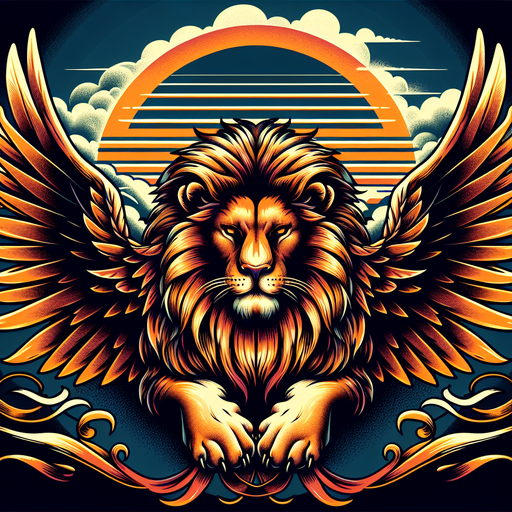

In [63]:
#minimal prompt (exact)
download_and_display_image(get_image_url(prompt_minimal, exact = True), scale_factor = 0.5)

Final prompt sent to model: A majestic lion, its mane reflecting the dying light of the day, stretches its large,
feathered wings beautifully against an evening sky that's a riot of orange and red hues. The imposing figure of the lion
stands on a vast, open plain. In the backdrop, the sun is setting over the horizon, casting long shadows and bathing
everything in a warm, golden glow..   To ensure your original prompt is passed to the model with no modifications, use
exact=True in the get_image_url() function


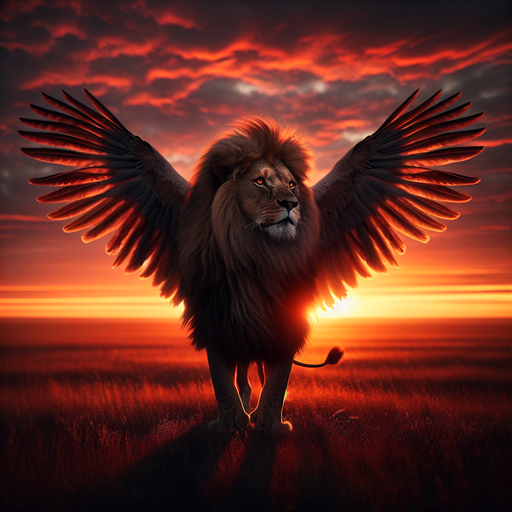

In [64]:
download_and_display_image(get_image_url(prompt_minimal, exact = False), scale_factor = 0.5)

# Text to speech

Folder for the outputs

In [12]:
text_to_speech_output_folder = 'text_to_speech_outputs'

#### basic test

In [66]:
response = client.audio.speech.create(
    model="tts-1",
    voice="onyx",
    input="Hello world! This is a streaming test.",
)

response.stream_to_file( os.path.join(text_to_speech_output_folder, "hello_world.mp3"))
# response.with_streaming_response("output.mp3")

/var/folders/78/7l8366_n3pj6jn47gs4m1dkh0000gn/T/ipykernel_31430/4451271.py:7: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file( os.path.join(text_to_speech_output_folder, "hello_world.mp3"))


####  Can I get it to read the Wizard of Oz markdown file?

In [67]:
from langchain_community.document_loaders import DirectoryLoader

loader = DirectoryLoader('data/wizard_of_oz', glob="wiz*.md")
wizard_of_oz = loader.load()

In [68]:

wizard_of_oz_segment=wizard_of_oz[0].page_content[3036:5000].replace('\n',' ')

Voice1 (deeper, male)

In [40]:
response = client.audio.speech.create(
    model="tts-1",
    voice="alloy",
    input=wizard_of_oz_segment,
)

response.stream_to_file( os.path.join(text_to_speech_output_folder, "wizard_of_oz_ch1_alloy.mp3"))




/var/folders/78/7l8366_n3pj6jn47gs4m1dkh0000gn/T/ipykernel_19576/3582876983.py:7: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("wizard_of_oz_ch1_alloy.mp3")


Voice2 (female)

In [41]:
response = client.audio.speech.create(
    model="tts-1",
    voice="shimmer",
    input=wizard_of_oz_segment,
)

response.stream_to_file(os.path.join(text_to_speech_output_folder, "wizard_of_oz_ch1_shimmer.mp3"))


/var/folders/78/7l8366_n3pj6jn47gs4m1dkh0000gn/T/ipykernel_19576/138731786.py:7: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("wizard_of_oz_ch1_shimmer.mp3")


## Can I use this to read html files?
I got quite curious about this text-to-speech functionality, because the voice conversation feature within ChatGPT has a more fluid human-like voice than any text-to-speech reader I have encountered, but you can't just put a url into ChatGPT and ask it to read it to you. 

However, you can access their text-to-speech functionality through the API (as above), so I decided to try to build a tool that can take a url as an input and output a mp3 file. The initial use case I have for this is to convert newsletters I usually receive by email into audio format so I can listen to them while I'm on the go, like a podcast. 

I've given this a go in a separate [github project](https://github.com/nikmitch/text_to_speech/tree/main)